## Лабораторная работа №1

### Численное интегрирование


Ступак Дмитрий
Б03-207

#### Постановка задачи

Используя предложенные методы, вычислить интеграл от заданной функции  f(x)  по заданному  интервалу  [a, b]. Допустимый уровень погрешности  e=0.0001.


\begin{equation}
f(x) = \frac{x^2+3x}{ln(x)},\ x \in [0,1]
\end{equation}


Представить в качестве результатов:
- формулы для вычисления интегралов
- использованный шаг интегрирования (его оценка)
- таблицу значений функции в узлах интегрирования
- вычисленное значение интеграла
- точное значение интеграла и сопоставление фактической погрешности с теоретической
- оценка погрешности по правилу Рунге

Примечание. Если вычисления проводились с последовательно уменьшающимся шагом, то представить соответствующие промежуточные приближения для интеграла.

Для вычисления интеграла использовать 5 методов:
- прямоугольников (левых, правых, центральных),
- трапеций,
- Симпсона.


Реальным значением интеграла с заданной точностью

\begin{equation}
\int_{0}^{0.9} \frac{x^2+3x}{ln(x)} \, dx \approx -4.4077
\end{equation}
(Рассчитано с помощью WolframAlpha)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
eps = 1e-4
int_true = -4.4077

In [2]:
def f(x):
    return (x*x+3*x)/(np.log(x))

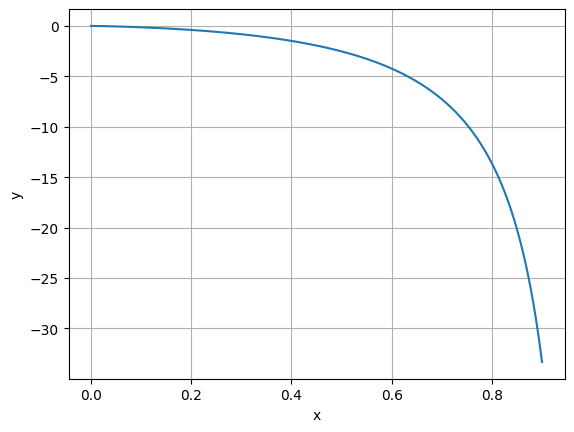

In [3]:
plt.xlabel("x")
plt.ylabel("y")

x_plot = np.linspace(eps, 0.9, 1000)
plt.grid()
plt.plot(x_plot, f(x_plot))
plt.show()

Первая производная:

$$
f'(x) = \frac{-3 - x + (3 + 2x) \cdot \ln(x)}{(\ln(x))^2}
$$

Вторая производная:

$$
f''(x) = \frac{2(3 + x) - 3(1 + x) \cdot \ln(x) + 2x \cdot (\ln(x))^2}{x \cdot (\ln(x))^3}
$$

Четвертая производная:

$$
f''''(x) = \frac{2 \left(12(3 + x) + (x - 3) \cdot (\ln(x))^3 - (3 + x) \cdot (\ln(x))^2 - 6(x - 3) \cdot \ln(x)\right)}{x^3 \cdot (\ln(x))^5}
$$

In [4]:
def df(x):
    return (-3 - x + (3 + 2 * x) * np.log(x)) / ((np.log(x)) ** 2)
    
def d2f(x):
    return (2 * (3 + x) - 3 * (1 + x) * np.log(x) + 2 * x * (np.log(x)) ** 2) / (x * (np.log(x)) ** 3)
    
def d4f(x):
    return (2 * (12 * (3 + x) + (x - 3) * (np.log(x)) ** 3 - (3 + x) * (np.log(x)) ** 2 - 6 * (x - 3) * np.log(x))) / (x ** 3 * (np.log(x)) ** 5)

In [7]:
delta = 0.2
while True:
    result = quad(func=f, a=0, b=delta)
    if abs(result[0]) < eps/2:
        break
    delta -= 0.00001

print(f'Интеграл меньше погрешности при δ < {delta}')

delta = 0.01265

tail = quad(func=f, a=0, b=delta)[0]
print(f'Остаток равен {tail}')

Интеграл меньше погрешности при δ < 0.012659999999940434
Остаток равен -4.9877859954280966e-05


-4.9877859954280966e-05

In [8]:
a = delta
b = 0.9
tail = tail

#### Метод левых прямоугольников

\begin{equation}
\int_{a}^{b} f(x) \, dx \approx  \sum_{i=0}^{n-1} f(x_i) * (x_{i+1} - x_i)
\end{equation}


##### Вычислим h

\begin{equation}
h \leq \frac{2 * \epsilon}{(b - a) * M_1}, \ где \  M_1 = \max_{x \in [a,b]} \left| f'(x) \right|
\end{equation}

In [59]:
m1 = abs(df(b))  
h_left = 2 * eps / ((b - a) * m1)

print(f'h <= {h_left}, берем h = 5e-08')
h_left = 5e-08

h <= 5.679013378284436e-07, берем h = 5e-08


In [60]:
x_left = np.arange(a, b, h_left)

s_left = tail

left_sums = []
for i in range(len(x_left) - 1):
    s_left += f(x_left[i]) * (x_left[i + 1] - x_left[i])
    left_sums.append(s_left)
    
print(f'Интеграл методом левых прямоугольников равен {round(s_left,4)}')
print(f'Фактическая погрешность  {abs(int_true - s_left)}')

table_left_rect = pd.DataFrame({'x': x_left[1:], 'y': left_sums})
table_left_rect

Интеграл методом левых прямоугольников равен -4.4077
Фактическая погрешность  2.9134989041779136e-05


,x,y
0,0.01265,-0.000050
1,0.01265,-0.000050
2,0.01265,-0.000050
3,0.01265,-0.000050
4,0.01265,-0.000050
...,...,...
17746994,0.90000,-4.407664
17746995,0.90000,-4.407666
17746996,0.90000,-4.407668
17746997,0.90000,-4.407669


##### Оценка погрешности правилом Рунге

\begin{equation}
p = log_2 (\frac{ \left| S_h - S_{2h} \right|}{\epsilon} + 1)
\end{equation}

In [61]:
x_left_2h = np.arange(a, b, 2 * h_left)

s_left_2h = tail

for i in range(len(x_left_2h) - 1):
    s_left_2h += f(x_left_2h[i]) * (x_left_2h[i + 1] - x_left_2h[i])

p_left = np.log2((abs(s_left_2h - s_left) / eps) + 1)

print(f'Оценка погрешности правилом Рунге - {p_left}')

Оценка погрешности правилом Рунге - 0.03560058742082004


#### Метод правых прямоугольников

\begin{equation}
\int_{a}^{b} f(x) \, dx \approx  \sum_{i=1}^{n} f(x_i) * (x_i - x_{i-1})
\end{equation}


##### Вычислим h

\begin{equation}
h \leq \frac{2 * \epsilon}{(b - a) * M_1}, \ где \  M_1 = \max_{x \in [a,b]} \left| f'(x) \right|
\end{equation}


In [62]:
m1 = abs(df(b))
h_right = 2 * eps / (b - a) / m1

print(f'h <= {h_right}, возьмём h = 5e-08')

h_right = 5e-08

h <= 5.679013378284436e-07, возьмём h = 5e-07


In [63]:
x_right = np.arange(a, b, h_right)

s_right = tail

right_sums = []
for i in range(1, len(x_right)):
    s_right += f(x_right[i]) * (x_right[i] - x_right[i - 1])
    right_sums.append(s_right)

print(f'Интеграл методом правых прямоугольников равен {round(s_right, 4)}')
print(f'Фактическая погрешность  {abs(int_true - s_right)}')

table_right = pd.DataFrame({'x': x_right[1:], 'y': right_sums})
table_right

Интеграл методом правых прямоугольников равен -4.4077
Фактическая погрешность  2.746971672262788e-05


,x,y
0,0.01265,-0.000050
1,0.01265,-0.000050
2,0.01265,-0.000050
3,0.01265,-0.000050
4,0.01265,-0.000050
...,...,...
17746994,0.90000,-4.407666
17746995,0.90000,-4.407668
17746996,0.90000,-4.407669
17746997,0.90000,-4.407671


##### Оценка погрешности правилом Рунге

\begin{equation}
p = log_2 (\frac{ \left| S_h - S_{2h} \right|}{\epsilon} + 1)
\end{equation}

In [64]:
x_right_2h = np.arange(a, b, 2 * h_right)

s_right_2h = tail

for i in range(len(x_right_2h) - 1):
    s_right_2h += f(x_right_2h[i]) * (x_right_2h[i + 1] - x_right_2h[i])

p_right = np.log2((abs(s_right_2h - s_right) / eps) + 1)

print(f'Оценка погрешности правилом Рунге - {p_right}')

Оценка погрешности правилом Рунге - 0.058851427931985764


#### Метод центральных прямоугольников

\begin{equation}
\int_{a}^{b} f(x) \, dx \approx  \sum_{i=0}^{n-1} f(\frac{x_{i+1} + x_i}{2}) * (x_{i+1} - x_i)
\end{equation}

##### Вычислим h

\begin{equation}
h \leq \sqrt[2]{\frac{24 * \epsilon}{(b - a) * M_2}}, \ где \  M_2 = \max_{x \in [a,b]} \left| f''(x) \right|
\end{equation}


In [66]:
m2 = abs(d2f(b))
h_center = np.sqrt(24 * eps / (b - a) / m2)

print(f'h <= {h_center}, возьмём h = 5e-8')

h_center = 5e-8

h <= 0.0005814687107300214, возьмём h = 5e-8


In [67]:
x_center = np.arange(a, b, h_center)

s_center = tail

center_sums = []
for i in range(len(x_center) - 1):
    s_center += f((x_center[i + 1] + x_center[i]) / 2) * (x_center[i + 1] - x_center[i])
    center_sums.append(s_center)

print(f'Интеграл методом центральных прямоугольников равен {round(s_center, 4)}')
print(f'Фактическая погрешность  {abs(int_true - s_center)}')

table_center_rect = pd.DataFrame({'x': x_center[1:], 'y': center_sums})
table_center_rect

Интеграл методом центральных прямоугольников равен -4.4077
Фактическая погрешность  2.83023527014592e-05


,x,y
0,0.01265,-0.000050
1,0.01265,-0.000050
2,0.01265,-0.000050
3,0.01265,-0.000050
4,0.01265,-0.000050
...,...,...
17746994,0.90000,-4.407665
17746995,0.90000,-4.407667
17746996,0.90000,-4.407668
17746997,0.90000,-4.407670


##### Оценка погрешности правилом Рунге

\begin{equation}
p = log_2 (\frac{ \left| S_h - S_{2h} \right|}{\epsilon} + 1)
\end{equation}

In [68]:
x_center_2h = np.arange(a, b, 2 * h_center)

s_center_2h = tail

for i in range(len(x_center_2h) - 1):
    s_center_2h += f((x_center_2h[i + 1] + x_center_2h[i]) / 2) * (x_center_2h[i + 1] - x_center_2h[i])

p_center = np.log2(abs(s_center_2h - s_center) / eps + 1)

print(f'Оценка погрешности правилом Рунге - {p_center}')

Оценка погрешности правилом Рунге - 0.023833139737097584


#### Метод трапеций


\begin{equation}
\int_{a}^{b} f(x) \, dx \approx  \sum_{i=0}^{n-1} \frac{f(x_{i+1}) + f(x_i)}{2} * (x_{i+1} - x_i)
\end{equation}

##### Вычислим h

\begin{equation}
h \leq \sqrt[2]{\frac{24 * \epsilon}{(a - b) * M_2}}, \ где \  M_2 = \max_{x \in [a,b]} \left| f''(x) \right|
\end{equation}


In [69]:
m2 = abs(d2f(b))
h_trapezoid = np.sqrt(12 * eps / (b - delta) / m2)

print(f'h <= {h_trapezoid}, возьмём h = 5e-8')

h_trapezoid = 5e-8

h <= 0.0004111604684049972, возьмём h = 5e-8


In [70]:
x_trapezoid = np.arange(delta, b, h_trapezoid)

s_trapezoid = tail
trapezoid_sums = []

for i in range(len(x_trapezoid) - 1):
    s_trapezoid += (f(x_trapezoid[i + 1]) + f(x_trapezoid[i])) / 2 * (x_trapezoid[i + 1] - x_trapezoid[i])
    trapezoid_sums.append(s_trapezoid)

print(f'Интеграл методом трапеций равен {round(s_trapezoid, 4)}')
print(f'Фактическая погрешность  {abs(int_true - s_trapezoid)}')

table_trapezoid = pd.DataFrame({'x': x_trapezoid[1:], 'y': trapezoid_sums})
table_trapezoid

Интеграл методом трапеций равен -4.4077
Фактическая погрешность  2.8302352575337864e-05


,x,y
0,0.01265,-0.000050
1,0.01265,-0.000050
2,0.01265,-0.000050
3,0.01265,-0.000050
4,0.01265,-0.000050
...,...,...
17746994,0.90000,-4.407665
17746995,0.90000,-4.407667
17746996,0.90000,-4.407668
17746997,0.90000,-4.407670


##### Оценка погрешности правилом Рунге

\begin{equation}
p = log_2 (\frac{ \left| S_h - S_{2h} \right|}{\epsilon} + 1)
\end{equation}

In [71]:
x_trapezoid_2h = np.arange(delta, b, 2 * h_trapezoid)

s_trapezoid_2h = tail

for i in range(len(x_trapezoid_2h) - 1):
    s_trapezoid_2h += (f(x_trapezoid_2h[i + 1]) + f(x_trapezoid_2h[i])) / 2 * (x_trapezoid_2h[i + 1] - x_trapezoid_2h[i])

p_trapezoid = np.log2(abs(s_trapezoid_2h - s_trapezoid) / eps + 1)

print(f'Оценка погрешности правилом Рунге - {p_trapezoid}')

Оценка погрешности правилом Рунге - 0.023833134884648402


#### Метод Симпсона

\begin{equation}
\int_{a}^{b} f(x) \, dx \approx  \sum_{i=0}^{n-1} \frac{f(x_{i+1})+ 4 * f(\frac{x_{i+1} + x_i}{2}) + f(x_i)}{6} * (x_{i+1} - x_i)
\end{equation}

##### Вычислим h

\begin{equation}
h \leq \sqrt[4]{\frac{2880 * \epsilon}{(b - a) * M_4}}, \ где \  M_2 = \max_{x \in [a,b]} \left| f''(x) \right|
\end{equation}


In [72]:
m4 = abs(d4f(b))
h_simpson = (2880 * eps / (b - a) / m4) ** 0.25

print(f'h <= {h_simpson}, возьмём h = 5e-8, благодаря неравенству')

h_simpson = 5e-8

h <= 0.013559902579705034, возьмём h = 5e-8, благодаря неравенству


In [78]:
x_simpson = np.arange(a, b, h_simpson)

s_simpson = tail
table_trapezoid = pd.DataFrame(columns=['x', 'y'])

simpson_sums = []
for i in range(len(x_simpson) - 1):
    s_simpson += (f(x_simpson[i + 1]) + 4 * f((x_simpson[i + 1] + x_simpson[i]) / 2) + f(
        x_simpson[i])) / 6 * (x_simpson[i + 1] - x_simpson[i])
    simpson_sums.append(s_simpson)

print(f'Интеграл методом Симпсона {round(s_simpson, 4)}')
print(f'Фактическая погрешность {abs(int_true - s_simpson)}')

table_simpson = pd.DataFrame({'x': x_simpson[1:], 'y': simpson_sums})
table_simpson

Интеграл методом Симпсона -4.4077
Фактическая погрешность 2.8302352665043884e-05


,x,y
0,0.01265,-0.000050
1,0.01265,-0.000050
2,0.01265,-0.000050
3,0.01265,-0.000050
4,0.01265,-0.000050
...,...,...
17746994,0.90000,-4.407665
17746995,0.90000,-4.407667
17746996,0.90000,-4.407668
17746997,0.90000,-4.407670


##### Оценка погрешности правилом Рунге

\begin{equation}
p = log_2 (\frac{ \left| S_h - S_{2h} \right|}{\epsilon} + 1)
\end{equation}

In [74]:
x_simpson_2h = np.arange(a, b, 2 * h_simpson)

s_simpson_2h = tail

for i in range(len(x_simpson_2h) - 1):
    s_simpson_2h += (f(x_simpson_2h[i + 1]) + 4 * f((x_simpson_2h[i + 1] + x_simpson_2h[i]) / 2) + f(
        x_simpson_2h[i])) / 6 * (x_simpson_2h[i + 1] - x_simpson_2h[i])

p_simpson_rect = np.log2(abs(s_simpson_2h - s_simpson) / eps + 1)

print(f'Оценка погрешности правилом Рунге - {p_simpson_rect}')

Оценка погрешности правилом Рунге - 0.023833138048193196


In [82]:
error_table = pd.DataFrame(
    {"Метод": ['Левый прямоугольник', 'Правый прямоугольник', 'Центральный прямоугольник', 'Трапеция', 'Симпсон'],
     "Погрешность": [s_left - int_true, s_right - int_true, s_center - int_true, 
                     s_trapezoid - int_true, s_simpson - int_true],
     "Погрешность по Рунгe": [p_left, p_right, p_center, p_trapezoid, p_simpson_rect]})
error_table


,Метод,Погрешность,Погрешность по Рунгe
0,Левый прямоугольник,0.000029,0.035601
1,Правый прямоугольник,0.000027,0.058851
2,Центральный прямоугольник,0.000028,0.023833
3,Трапеция,0.000028,0.023833
4,Симпсон,0.000028,0.023833


#### Вывод

Посчитали интеграл пятью методами (левых прямоугольников, правых прямоугольников, центральных прямоугольников, трапеций и Симпсона). 
Каждый из методов вычислил интеграл с погрешностью меньшей, чем заданная.

Также были оценены погрешности правилом Рунге. Наименьшая погрешность по правилу Рунге у методов
Центральных прямоугольников
Трапеций
Симпсона 
А наибольшая у метода правых прямоугольников. То есть, метод правых прямоугольников сходится медленней всех остальных.
Также было выявлено, что лучше брать шаг разбиения настолько маленьким, насколько этого позволяют вычислительные мощности. Иначе погрешность правилом Рунге оказывается слишком большой 